In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib  inline 

# Exploration des données


In [4]:
data = pd.read_csv('diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


===> tous les valeurs sont numeriques 

==> pas de missing values 

In [8]:

(unique, counts) = np.unique(data['Outcome'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Unique values of the target variable [0 1]
Counts of the target variable : [500 268]


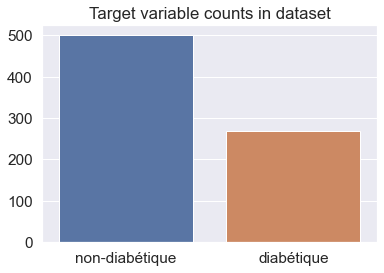

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=["non-diabétique","diabétique"], y=counts)
plt.title('Target variable counts in dataset')
plt.show()

# Data pre-processing 

In [12]:
# Step 1: Define explonatory variables and target variable

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
               'BMI', 'DiabetesPedigreeFunction', 'Age']

X = data[features]
y = data['Outcome']

In [13]:
# Step 2:  Apply normalization operation for numerical stability

from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [14]:
# Step 3: Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)


In [15]:
# Step 4: Fit a Logistic Regression Model to the train data

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [16]:
# Step 5: Make predictions on the testing data

y_pred = log_reg.predict(X_test)

print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0]


In [17]:
y_proba = log_reg.predict_proba(X_test)

print(y_proba)

[[0.04287527 0.95712473]
 [0.83339217 0.16660783]
 [0.91117864 0.08882136]
 [0.36389375 0.63610625]
 [0.88147995 0.11852005]
 [0.9616617  0.0383383 ]
 [0.25557549 0.74442451]
 [0.14240513 0.85759487]
 [0.59949076 0.40050924]
 [0.61381936 0.38618064]
 [0.41553408 0.58446592]
 [0.03948784 0.96051216]
 [0.71224253 0.28775747]
 [0.81853612 0.18146388]
 [0.8738921  0.1261079 ]
 [0.83954581 0.16045419]
 [0.142193   0.857807  ]
 [0.97493439 0.02506561]
 [0.56031934 0.43968066]
 [0.75415907 0.24584093]
 [0.34240246 0.65759754]
 [0.59320098 0.40679902]
 [0.80916552 0.19083448]
 [0.93032054 0.06967946]
 [0.94825263 0.05174737]
 [0.65456933 0.34543067]
 [0.95462472 0.04537528]
 [0.08983332 0.91016668]
 [0.89255169 0.10744831]
 [0.86622599 0.13377401]
 [0.53025164 0.46974836]
 [0.74662435 0.25337565]
 [0.89854336 0.10145664]
 [0.541814   0.458186  ]
 [0.90618257 0.09381743]
 [0.31718186 0.68281814]
 [0.54230085 0.45769915]
 [0.91232461 0.08767539]
 [0.67868933 0.32131067]
 [0.27941541 0.72058459]


## Evaluation de la perfomance du modèle

### acuracy score

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8020833333333334

### confusion matrix

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

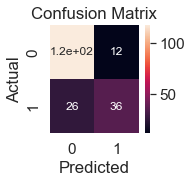

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (2,2))
sns.set(font_scale=1.4)#for label size
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print('Recall = {:0.3f}'.format(recall_score(y_test, y_pred)))
print('Precision_measure = {:0.3f}'.format(precision_score(y_test, y_pred)))
print('F1_measure = {:0.3f}'.format(f1_score(y_test, y_pred)))

Recall = 0.581
Precision_measure = 0.750
F1_measure = 0.655


## Autres classifieurs binaires dans la bibliothèque Scikit-Learn

In [22]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [23]:
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

C:\Users\Mostafa\Documents\machine learning\regression\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.802083,0.580645,0.750000
Support Vector Machines,0.796875,0.580645,0.734694
Decision Trees,0.744792,0.629032,0.600000
Random Forest,0.776042,0.564516,0.686275
Naive Bayes,0.765625,0.532258,0.673469
K-Nearest Neighbor,0.807292,0.645161,0.727273


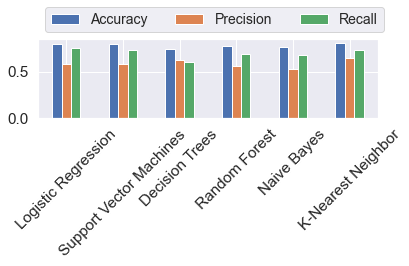

In [25]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()